# Question 1

In [3]:
# i)
# importing the dataset
dataset<-read.csv("DATASET.csv", stringsAsFactors = TRUE)
str(dataset)

'data.frame':	690 obs. of  16 variables:
 $ Gender        : int  1 0 0 1 1 1 1 0 1 1 ...
 $ Age           : num  30.8 58.7 24.5 27.8 20.2 ...
 $ Debt          : num  0 4.46 0.5 1.54 5.62 ...
 $ Married       : int  1 1 1 1 1 1 1 1 0 0 ...
 $ BankCustomer  : int  1 1 1 1 1 1 1 1 0 0 ...
 $ Industry      : Factor w/ 14 levels "CommunicationServices",..: 8 10 10 8 8 1 13 9 6 8 ...
 $ Ethnicity     : Factor w/ 5 levels "Asian","Black",..: 5 2 2 5 5 5 2 5 2 5 ...
 $ YearsEmployed : num  1.25 3.04 1.5 3.75 1.71 ...
 $ PriorDefault  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Employed      : int  1 1 0 1 0 0 0 0 0 0 ...
 $ CreditScore   : int  1 6 0 5 0 0 0 0 0 0 ...
 $ DriversLicense: int  0 0 0 1 0 1 1 0 0 1 ...
 $ Citizen       : Factor w/ 3 levels "ByBirth","ByOtherMeans",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ ZipCode       : int  202 43 280 100 120 360 164 80 180 52 ...
 $ Income        : int  0 560 824 3 0 0 31285 1349 314 1442 ...
 $ Approved      : int  1 1 1 1 1 1 1 1 1 1 ...


In [5]:
# checking on the features of the approved variable
table(dataset$Approved)


  0   1 
383 307 

In [6]:
# making the Approved variable factors since it is categorical
dataset$Approved<-factor(dataset$Approved, levels = c(0,1), labels = c("No", "Yes"))
str(dataset)

'data.frame':	690 obs. of  16 variables:
 $ Gender        : int  1 0 0 1 1 1 1 0 1 1 ...
 $ Age           : num  30.8 58.7 24.5 27.8 20.2 ...
 $ Debt          : num  0 4.46 0.5 1.54 5.62 ...
 $ Married       : int  1 1 1 1 1 1 1 1 0 0 ...
 $ BankCustomer  : int  1 1 1 1 1 1 1 1 0 0 ...
 $ Industry      : Factor w/ 14 levels "CommunicationServices",..: 8 10 10 8 8 1 13 9 6 8 ...
 $ Ethnicity     : Factor w/ 5 levels "Asian","Black",..: 5 2 2 5 5 5 2 5 2 5 ...
 $ YearsEmployed : num  1.25 3.04 1.5 3.75 1.71 ...
 $ PriorDefault  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Employed      : int  1 1 0 1 0 0 0 0 0 0 ...
 $ CreditScore   : int  1 6 0 5 0 0 0 0 0 0 ...
 $ DriversLicense: int  0 0 0 1 0 1 1 0 0 1 ...
 $ Citizen       : Factor w/ 3 levels "ByBirth","ByOtherMeans",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ ZipCode       : int  202 43 280 100 120 360 164 80 180 52 ...
 $ Income        : int  0 560 824 3 0 0 31285 1349 314 1442 ...
 $ Approved      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...

In [7]:
# randomizing the data
set.seed(1234)
data_rand<-dataset[order(runif(690)),]
str(data_rand)

'data.frame':	690 obs. of  16 variables:
 $ Gender        : int  1 0 0 1 1 1 0 0 0 1 ...
 $ Age           : num  17.4 24.3 30.2 20 33.2 ...
 $ Debt          : num  6.5 2.5 5.5 0 1.04 0.04 0.835 5 6 12.5 ...
 $ Married       : int  1 0 1 1 1 1 1 1 1 0 ...
 $ BankCustomer  : int  1 0 1 1 1 1 1 1 1 0 ...
 $ Industry      : Factor w/ 14 levels "CommunicationServices",..: 2 2 6 11 13 4 10 9 11 6 ...
 $ Ethnicity     : Factor w/ 5 levels "Asian","Black",..: 5 1 5 5 2 5 5 5 5 2 ...
 $ YearsEmployed : num  0.125 4.5 5.5 0.5 6.5 ...
 $ PriorDefault  : int  0 0 0 0 1 0 1 1 0 0 ...
 $ Employed      : int  0 0 0 0 0 1 1 0 0 0 ...
 $ CreditScore   : int  0 0 0 0 0 1 1 0 0 0 ...
 $ DriversLicense: int  0 0 1 0 1 0 0 1 0 1 ...
 $ Citizen       : Factor w/ 3 levels "ByBirth","ByOtherMeans",..: 1 1 2 1 1 2 1 1 1 1 ...
 $ ZipCode       : int  60 200 100 144 164 560 0 980 272 0 ...
 $ Income        : int  100 456 0 0 31285 0 0 0 0 17 ...
 $ Approved      : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 2 2 1 1

In [9]:
# splitting the data into 70% training and 30% test data
# 690*.7
# 690*.3
data_train<-data_rand[1:483,]
data_test<-data_rand[484:690,]

In [27]:
# training the C5.0 model
# install.packages("C50")
library(C50)
data_model<-C5.0(data_train[,-16], data_train$Approved)
data_model


Call:
C5.0.default(x = data_train[, -16], y = data_train$Approved)

Classification Tree
Number of samples: 483 
Number of predictors: 15 

Tree size: 25 

Non-standard options: attempt to group attributes


In [16]:
summary(data_model)


Call:
C5.0.default(x = data_train[, -16], y = data_train$Approved, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Thu Oct 27 12:36:11 2022
-------------------------------

Class specified by attribute `outcome'

Read 483 cases (16 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

PriorDefault <= 0:
:...Citizen in {ByBirth,ByOtherMeans}: No (221/12)
:   Citizen = Temporary: Yes (6/1)
PriorDefault > 0:
:...Employed > 0: Yes (152/12)
    Employed <= 0:
    :...Industry in {ConsumerDiscretionary,Healthcare}: No (9/2)
        Industry in {Industrials,Materials,Research,Transport}: Yes (22/3)
        Industry = CommunicationServices:
        :...Citizen = ByBirth: Yes (2)
        :   Citizen in {ByOtherMeans,Temporary}: No (4)
        Industry = Education:
        :...Citizen in {ByBirth,Temporary}: Yes (4)
        :   Citizen = ByOtherMeans: No (1)
        Industry = Financials:
        :...Citizen in {ByBirth,Temporary}: Yes (6/1)
        :   Citizen = ByOtherMean

In [28]:
# running predict function on the test data
data_predict<-predict(data_model, data_test[,-16])

In [29]:
# ii)
# confusion matrix to check on the performance of the model
# install.packages("gmodels")
# install.packages("caret")
library(gmodels)
CrossTable(data_predict, data_test[,16], dnn = c("predicted", "actual"))

# The model is 88% accurate


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  207 

 
             | actual 
   predicted |        No |       Yes | Row Total | 
-------------|-----------|-----------|-----------|
          No |        99 |        14 |       113 | 
             |    20.100 |    25.622 |           | 
             |     0.876 |     0.124 |     0.546 | 
             |     0.853 |     0.154 |           | 
             |     0.478 |     0.068 |           | 
-------------|-----------|-----------|-----------|
         Yes |        17 |        77 |        94 | 
             |    24.163 |    30.801 |           | 
             |     0.181 |     0.819 |     0.454 | 
             |     0.147 |     0.846 |           | 
             |     0.082 |     0.372 |           | 
-------------|-----------|-----------|--------

The model is 88% accurate  
Precision = 0.819  
Sensitivity = 0.846   
Specificity = 0.853  

In [26]:
# iii)
# install.packages("RWeka")
# training the model using the 1-ripper model
library(RWeka)

data_R<-OneR(Approved~., data = data_rand)
summary(data_R)


=== Summary ===

Correctly Classified Instances         590               85.5072 %
Incorrectly Classified Instances       100               14.4928 %
Kappa statistic                          0.7116
Mean absolute error                      0.1449
Root mean squared error                  0.3807
Relative absolute error                 29.3404 %
Root relative squared error             76.6048 %
Total Number of Instances              690     

=== Confusion Matrix ===

   a   b   <-- classified as
 306  77 |   a = No
  23 284 |   b = Yes

From the confusion matrix, the model gives an accuracy of 85.5%.  

In [30]:
# iv)
# improving the model performance
# boosting the C5.0 model by increasing the number of trials by 10
data_boost10<-C5.0(data_train[,-16], data_train$Approved, trials = 10)
summary(data_boost10)


Call:
C5.0.default(x = data_train[, -16], y = data_train$Approved, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Thu Oct 27 12:56:13 2022
-------------------------------

Class specified by attribute `outcome'

Read 483 cases (16 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

PriorDefault <= 0:
:...Citizen in {ByBirth,ByOtherMeans}: No (221/12)
:   Citizen = Temporary: Yes (6/1)
PriorDefault > 0:
:...Employed > 0: Yes (152/12)
    Employed <= 0:
    :...Industry in {ConsumerDiscretionary,Healthcare}: No (9/2)
        Industry in {Industrials,Materials,Research,Transport}: Yes (22/3)
        Industry = CommunicationServices:
        :...Citizen = ByBirth: Yes (2)
        :   Citizen in {ByOtherMeans,Temporary}: No (4)
        Industry = Education:
        :...Citizen in {ByBirth,Temporary}: Yes (4)
        :   Citizen = ByOtherMeans: No (1)
        Industry = Financials:
        :...Citizen in {ByBirth,Temporary}: Yes (6/1)
        :   Citizen = ByOtherMean

In [31]:
data_predict_boost<-predict(data_boost10, data_test[,-16])
CrossTable(data_predict_boost, data_test[,16], dnn = c("predicted", "actual"))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  207 

 
             | actual 
   predicted |        No |       Yes | Row Total | 
-------------|-----------|-----------|-----------|
          No |       102 |        11 |       113 | 
             |    23.622 |    30.112 |           | 
             |     0.903 |     0.097 |     0.546 | 
             |     0.879 |     0.121 |           | 
             |     0.493 |     0.053 |           | 
-------------|-----------|-----------|-----------|
         Yes |        14 |        80 |        94 | 
             |    28.397 |    36.199 |           | 
             |     0.149 |     0.851 |     0.454 | 
             |     0.121 |     0.879 |           | 
             |     0.068 |     0.386 |           | 
-------------|-----------|-----------|--------

Model accuracy is stil 87.9%

In [32]:
# improving the OneR model by using the JRip model
data_J<-JRip(Approved~., data = data_rand)
summary(data_J)


=== Summary ===

Correctly Classified Instances         607               87.971  %
Incorrectly Classified Instances        83               12.029  %
Kappa statistic                          0.7562
Mean absolute error                      0.2068
Root mean squared error                  0.3216
Relative absolute error                 41.8757 %
Root relative squared error             64.7126 %
Total Number of Instances              690     

=== Confusion Matrix ===

   a   b   <-- classified as
 343  40 |   a = No
  43 264 |   b = Yes

The model is 87.971% accurate as well.

# Question 2

In [35]:
# i)
# import data as cars
cars<-read.csv("DATA(1).csv", stringsAsFactors = TRUE)
str(cars)

'data.frame':	10668 obs. of  9 variables:
 $ model       : Factor w/ 26 levels " A1"," A2"," A3",..: 1 6 1 4 3 1 6 4 3 1 ...
 $ year        : int  2017 2016 2016 2017 2019 2016 2016 2016 2015 2016 ...
 $ price       : int  12500 16500 11000 16800 17300 13900 13250 11750 10200 12000 ...
 $ transmission: Factor w/ 3 levels "Automatic","Manual",..: 2 1 2 1 2 1 1 2 2 2 ...
 $ mileage     : int  15735 36203 29946 25952 1998 32260 76788 75185 46112 22451 ...
 $ fuelType    : Factor w/ 3 levels "Diesel","Hybrid",..: 3 1 3 1 3 3 1 1 3 3 ...
 $ tax         : int  150 20 30 145 145 30 30 20 20 30 ...
 $ mpg         : num  55.4 64.2 55.4 67.3 49.6 58.9 61.4 70.6 60.1 55.4 ...
 $ engineSize  : num  1.4 2 1.4 2 1 1.4 2 2 1.4 1.4 ...


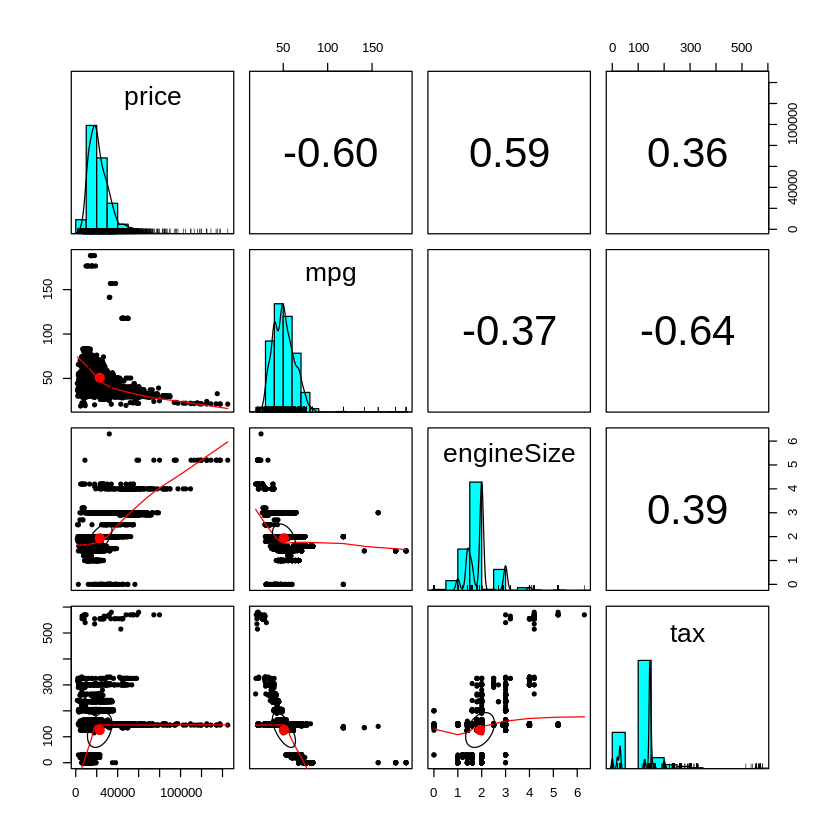

In [39]:
# identifying the correlation between 4 most important variable being price, mpg, 
# enginesize, and tax
# install.packages("psych")
library(psych)
pairs.panels(cars[c("price","mpg","engineSize","tax")])

There is a high correlation between the price and miles per gallon as well as between taxes and miles per gallon. The client should take into consideration what miles per gallon fuel consumption against tax and prices as they are all negatively correlated to it. 

In [40]:
# ii)
# Training the model on the linear regression
model1<-lm(price~., data = cars)
summary(model1)


Call:
lm(formula = price ~ ., data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-33111  -2097   -380   1547  44509 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.637e+06  6.088e+04 -59.732  < 2e-16 ***
model A2               1.909e+04  3.874e+03   4.929 8.40e-07 ***
model A3               1.288e+03  1.438e+02   8.952  < 2e-16 ***
model A4               1.630e+03  1.689e+02   9.651  < 2e-16 ***
model A5               2.995e+03  1.926e+02  15.551  < 2e-16 ***
model A6               3.544e+03  2.118e+02  16.733  < 2e-16 ***
model A7               4.640e+03  4.061e+02  11.425  < 2e-16 ***
model A8               8.226e+03  4.182e+02  19.669  < 2e-16 ***
model Q2               1.417e+03  1.845e+02   7.680 1.73e-14 ***
model Q3               2.898e+03  1.701e+02  17.039  < 2e-16 ***
model Q5               6.791e+03  2.173e+02  31.244  < 2e-16 ***
model Q7               1.511e+04  3.082e+02  49.033  < 2e-16 ***
model Q8    

The model has an $R^2$ of 89.18% and almost all variables are statistically significant at less than 0.1% significant level.

In [42]:
# iii) 
# adding the condition of meanprice on mpg and mileage
# mean(cars$price) = 22896.6850393701
cars$mileage_mean<-ifelse(cars$price > mean(cars$price), 1, 0)
cars$mpg_mean<- ifelse(cars$price > mean(cars$price), 1, 0)
str(cars)

'data.frame':	10668 obs. of  11 variables:
 $ model       : Factor w/ 26 levels " A1"," A2"," A3",..: 1 6 1 4 3 1 6 4 3 1 ...
 $ year        : int  2017 2016 2016 2017 2019 2016 2016 2016 2015 2016 ...
 $ price       : int  12500 16500 11000 16800 17300 13900 13250 11750 10200 12000 ...
 $ transmission: Factor w/ 3 levels "Automatic","Manual",..: 2 1 2 1 2 1 1 2 2 2 ...
 $ mileage     : int  15735 36203 29946 25952 1998 32260 76788 75185 46112 22451 ...
 $ fuelType    : Factor w/ 3 levels "Diesel","Hybrid",..: 3 1 3 1 3 3 1 1 3 3 ...
 $ tax         : int  150 20 30 145 145 30 30 20 20 30 ...
 $ mpg         : num  55.4 64.2 55.4 67.3 49.6 58.9 61.4 70.6 60.1 55.4 ...
 $ engineSize  : num  1.4 2 1.4 2 1 1.4 2 2 1.4 1.4 ...
 $ mileage_mean: num  0 0 0 0 0 0 0 0 0 0 ...
 $ mpg_mean    : num  0 0 0 0 0 0 0 0 0 0 ...


In [44]:
# Adding interaction effect
cars$mpg_eng<-cars$mpg*cars$engineSize
cars$year_milage<-cars$year*cars$mileage
str(cars)

'data.frame':	10668 obs. of  13 variables:
 $ model       : Factor w/ 26 levels " A1"," A2"," A3",..: 1 6 1 4 3 1 6 4 3 1 ...
 $ year        : int  2017 2016 2016 2017 2019 2016 2016 2016 2015 2016 ...
 $ price       : int  12500 16500 11000 16800 17300 13900 13250 11750 10200 12000 ...
 $ transmission: Factor w/ 3 levels "Automatic","Manual",..: 2 1 2 1 2 1 1 2 2 2 ...
 $ mileage     : int  15735 36203 29946 25952 1998 32260 76788 75185 46112 22451 ...
 $ fuelType    : Factor w/ 3 levels "Diesel","Hybrid",..: 3 1 3 1 3 3 1 1 3 3 ...
 $ tax         : int  150 20 30 145 145 30 30 20 20 30 ...
 $ mpg         : num  55.4 64.2 55.4 67.3 49.6 58.9 61.4 70.6 60.1 55.4 ...
 $ engineSize  : num  1.4 2 1.4 2 1 1.4 2 2 1.4 1.4 ...
 $ mileage_mean: num  0 0 0 0 0 0 0 0 0 0 ...
 $ mpg_mean    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mpg_eng     : num  77.6 128.4 77.6 134.6 49.6 ...
 $ year_milage : int  31737495 72985248 60371136 52345184 4033962 65036160 154804608 151572960 92915680 45261216 ...


In [45]:
# running the regression model
model2<-lm(price~., data = cars)
summary(model2)


Call:
lm(formula = price ~ ., data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-33051  -1912   -257   1543  36683 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.336e+06  7.791e+04 -55.652  < 2e-16 ***
model A2               7.655e+03  3.582e+03   2.137 0.032616 *  
model A3               1.775e+03  1.336e+02  13.282  < 2e-16 ***
model A4               2.507e+03  1.603e+02  15.645  < 2e-16 ***
model A5               3.685e+03  1.826e+02  20.176  < 2e-16 ***
model A6               4.520e+03  1.984e+02  22.779  < 2e-16 ***
model A7               5.962e+03  3.768e+02  15.824  < 2e-16 ***
model A8               8.585e+03  3.860e+02  22.244  < 2e-16 ***
model Q2               2.187e+03  1.716e+02  12.743  < 2e-16 ***
model Q3               4.226e+03  1.634e+02  25.861  < 2e-16 ***
model Q5               7.707e+03  2.072e+02  37.194  < 2e-16 ***
model Q7               1.519e+04  2.

The model has improved with an $R^2$ of 90.85% with all variables being statistically significant. 